# Intercepted: Analyzing Wiretap Records from the US Courts
##### Author: Henry Peyronnin

<img src= "http://www.tveskimo.com/wp-content/uploads/2017/11/The-Wire-Back-Burners-Recap-Season-3-Episode-7-2-1.png" height= 50% width = 50% style="float:left" />

## Contents
[Introduction](#Introduction)<br>
[Literature Review](#Literature-Review)<br>
[Exploratory Data Analysis](#Exploratory-Data-Analysis)

## Introduction

Under Title III of The Omnibus Crime Control and Safe Streets Act of 1968 and 18 U.S.C. § 2519, The Administrative Office of the United States Courts (AO) is required to publish annual federal and state __[records](https://www.uscourts.gov/statistics-reports/analysis-reports/wiretap-reports)__ of interception orders for wire, oral, or electronic communications. For each intercept, the AO's annual report includes information on the total cost and duration, the offense under investigation, the jurisdiction, and other data. The full set of variables is listed below.
    
    State
    Jurisdiction
    AO Number
    Judge
    Prosecutor
    Offense
    Intercept Type
    Location
    Application Date
    Original Order (Days)
    Number of Extensions
    Total Length (Days)
    Installation
    Number of Days in Operation
    Average Intercepts per Day
    Number of Persons Intercepted
    Number of Incriminating Intercepts
    Total Cost in Dollars
    Other Than Manpower Cost in Dollars
    Arrests
    Trials
    Motions to Suppress Intercepts
    Persons Convicted
    Cost Related
    Results Related
    
These data reveal important information about the use of surveillance in criminal investigations. Where are wiretaps used most, and for what types of crimes are they most often deployed? How do wiretap characteristics vary by crime, geography, and time period? What underlying changes in technology, policy, or society might explain these trends? Analyzing wiretap records also allow us to gauge their efficacy of as an investigative tool. How often do wiretaps result in arrests or convictions? Do their benefits outweight their costs? The overarching objective of this report is to answer some of these questions. 



## Literature Review

The breakup of AT&T in 1982 and Bell Systems later that decade led to a period of renewed competition, growth, and innovation in the telecommunications industry. As the number of telecommunications companies proliferated and new technologies flooded the market, the FBI struggled to keep pace with these new source of complexity. Worried about how this would affect their ability to conduct surveillance, the FBI pursued legislation in Congress that would protect its wiretapping abilities from the effect of potentially disruptive technologies. The FBI's argument in favor of legislative protection rested on a key unstated assumption: that wiretaps are indeed vital tools for law enforcement. Is this assumption indeed valid? In _Privacy on the Line_, Susan Landau and Whitfield Diffie (2010) attempt to find out by digging into the data on wiretaps. They draw mostly on records from 1988 to 1994, but also include data from 1968 to 2006. Their analysis yields insights into the efficacy of wiretaps as well as other aspects of their usage. 

When federal wiretap regulation went into effect in 1968, the majority of wiretaps (64%) were used for investigating gambling cases. Since then, however, the share of wiretaps devoted to narcotics investigations has steadily increased. In 1994, narcotics investigations accounted for 77% of all cases using electronic surveillance. As the use of electronic surveillance increasingly became concentrated on narcotics investigations, the average wiretap became longer and more costly. Between 1968 and 1994, the average cost of a wiretap rose from 1,358 to 49,478 dollars, and the length doubled from 20 to nearly 40 days (p. 209). This shift was largely due to the lengthy timelines involved in drug investigations, which can span months or years. 

Wiretaps occasionally result in large drug busts, which are often then used by advocates to defend the practice of wiretapping. It is unlikely that wiretaps actually affect the underlying problem of consumption, however, or that they are a better use of funds than alternative methods of stemming drug use (p. 211). The FBI has likewise cited the importance of wiretaps in investigations of kidnapping and domestic terrorism. Between 1968 and 1994, however, electronic surveillance only played a role in just 2-3 kidnapping cases per year, and domestic terrorism cases are more likely to be investigated under the Foreign Intelligence Surveillance Act (p. 211).

At the state level, 48 jurisdictions have laws that permit that authorize courts to issue orders for oral, wire, or electronic surveillance (AO, 2017). In 2017, the states with the most wiretaps were California, New York, Nevada, and North Carolina. Since the 1990s, California has seen a massive increase in wiretaps: from 8 in 1994 to 225 in 2017 (p. 212; AO, 2017). 

Many of the trends first observed by Landau and Diffie have continued apace in the 21st century, but two major changes in wiretapping have occured since the 1990s. First, portable devices became the most commonly wiretapped devices as people switched from landlines to mobile phones. Because portable devices increased the number of daily communications per person, the first change begot a second: the government began intercepting ever-greater volumes of communications. The number of intercepted conversations has increased from around 400,000 in 1968 to over 2 million (pp. 214-215).

Landau and Diffie note several limitations in the _Wiretap Report_ data. First, its statistics do not distinguish wiretaps from bugs. Second, due to reporting issues the data may actually underestimate the total number of intercepts installed. Third, the data lack important contextual information from the court hearings themselves.

### Roving Wiretaps

### Portable Devices

## Research Questions

Which types of wiretaps are the most expensive? Which are the longest? Which are most effective in terms of arrests and convictions?

Can we come up with a metric for assessing the efficiency of wiretaps? Maybe arrests/dollar spent, arrests/intercept? Can we rank jurisdictions based on these metrics?

Are there any notable differences between wiretaps that were reported vs. not reported?

## Exploratory Data Analysis

[Federal Courts](#Federal-Courts)<br>
[State Courts](#State-Courts)

In [201]:
#import libraries
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Federal Courts

In [308]:
#read federal intercept data
fed17 = pd.read_csv('fedwire_2017.csv')
fed17.head()

,Jurisdiction,A.O. Number,Judge,Attorney General or Designee,Offense,Type,Location,Application Date,Original Order (Days),Number of Extensions,...,Total Cost($),Other Than Manpower Cost ($),Arrests,Trials,Motions Granted,Motions Denied,Motions Pending,Persons Convicted,Cost Related,Results Related
0,"ALABAMA, MIDDLE",2017-1,"ALBRITTON, III",NaN,NARCOTICS,WC,D,02/28/2017,30.0,0.0,...,"269,859",0,3.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,"ALABAMA, MIDDLE",2017-2,"ALBRITTON, III",BLANCO,DRUGS - ILLEGAL,"WC,TX",D,04/05/2017,30.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"ALABAMA, MIDDLE",2017-3,"ALBRITTON, III",BLANCO,DRUGS - ILLEGAL,"WC,TX",D,02/28/2017,30.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"ALABAMA, MIDDLE",2017-4,"ALBRITTON, III",BLANCO,DRUGS - ILLEGAL,"WC,TX",D,03/07/2017,30.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"ALABAMA, MIDDLE",2017-5,"ALBRITTON, III",BLANCO,DRUGS - ILLEGAL,"WC,TX",D,04/05/2017,30.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [310]:
fed17.Jurisdiction.unique()

array(['ALABAMA, MIDDLE', 'ALABAMA, NORTHERN', 'ALABAMA, SOUTHERN',
       'ARIZONA', 'ARKANSAS, EASTERN', 'ARKANSAS, WESTERN',
       'CALIFORNIA, CENTRAL', 'CALIFORNIA, EASTERN',
       'CALIFORNIA, NORTHERN', 'CALIFORNIA, SOUTHERN', 'COLORADO',
       'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA',
       'FLORIDA, MIDDLE', 'FLORIDA, NORTHERN', 'FLORIDA, SOUTHERN',
       'GEORGIA, MIDDLE', 'GEORGIA, NORTHERN', 'GEORGIA, SOUTHERN',
       'HAWAII', 'IDAHO', 'ILLINOIS, CENTRAL', 'ILLINOIS, NORTHERN',
       'ILLINOIS, SOUTHERN', 'INDIANA, NORTHERN', 'INDIANA, SOUTHERN',
       'IOWA, NORTHERN', 'IOWA, SOUTHERN', 'KANSAS', 'KENTUCKY, EASTERN',
       'KENTUCKY, WESTERN', 'LOUISIANA, EASTERN', 'LOUISIANA, MIDDLE',
       'LOUISIANA, WESTERN', 'MAINE', 'MARYLAND', 'MASSACHUSETTS',
       'MICHIGAN, EASTERN', 'MICHIGAN, WESTERN', 'MINNESOTA',
       'MISSISSIPPI, NORTHERN', 'MISSISSIPPI, SOUTHERN',
       'MISSOURI, EASTERN', 'MISSOURI, WESTERN', 'MONTANA', 'NEBRASKA',
       'NEVADA'

In [203]:
fed17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 27 columns):
Jurisdiction                          3026 non-null object
A.O. Number                           3026 non-null object
Judge                                 3026 non-null object
Attorney General or Designee          992 non-null object
Offense                               3024 non-null object
Type                                  3026 non-null object
Location                              3026 non-null object
Application Date                      3026 non-null object
Original Order (Days)                 3019 non-null float64
Number of Extensions                  3026 non-null float64
Total Length (Days)                   3026 non-null float64
Installation                          3026 non-null object
Number of Days in Operation           1718 non-null float64
Avg. Intercepts Per Day               1688 non-null float64
Number of Persons Intercepts          1686 non-null object
Numb

In [204]:
#summarize data
fed17.describe()

,Original Order (Days),Number of Extensions,Total Length (Days),Number of Days in Operation,Avg. Intercepts Per Day,Arrests,Trials,Motions Granted,Motions Denied,Motions Pending,Persons Convicted
count,3019.000000,3026.000000,3026.000000,1718.000000,1688.000000,1633.000000,1619.000000,1621.000000,1621.000000,1621.000000,1619.000000
mean,29.836038,0.522802,45.279247,41.833527,414.114336,2.357012,0.017912,0.046885,0.024059,0.001234,0.362569
std,1.663931,1.097996,32.928960,33.149863,12546.685926,7.362417,0.318836,1.233393,0.641209,0.035115,2.941558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,30.000000,29.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,0.000000,30.000000,30.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,1.000000,60.000000,58.000000,115.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,16.000000,510.000000,510.000000,515477.000000,130.000000,11.000000,40.000000,25.000000,1.000000,70.000000


#### Check for missing values

In [205]:
import missingno as msno

In [206]:
fed17.isnull().sum()

Jurisdiction                             1
A.O. Number                              1
Judge                                    1
Attorney General or Designee          2035
Offense                                  3
Type                                     1
Location                                 1
Application Date                         1
Original Order (Days)                    8
Number of Extensions                     1
Total Length (Days)                      1
Installation                             1
Number of Days in Operation           1309
Avg. Intercepts Per Day               1339
Number of Persons Intercepts          1341
Number of Intercepts                  1330
Number of Incriminating Intercepts    1330
Total Cost($)                         1449
Other Than Manpower Cost ($)          1447
Arrests                               1394
Trials                                1408
Motions Granted                       1406
Motions Denied                        1406
Motions Pen

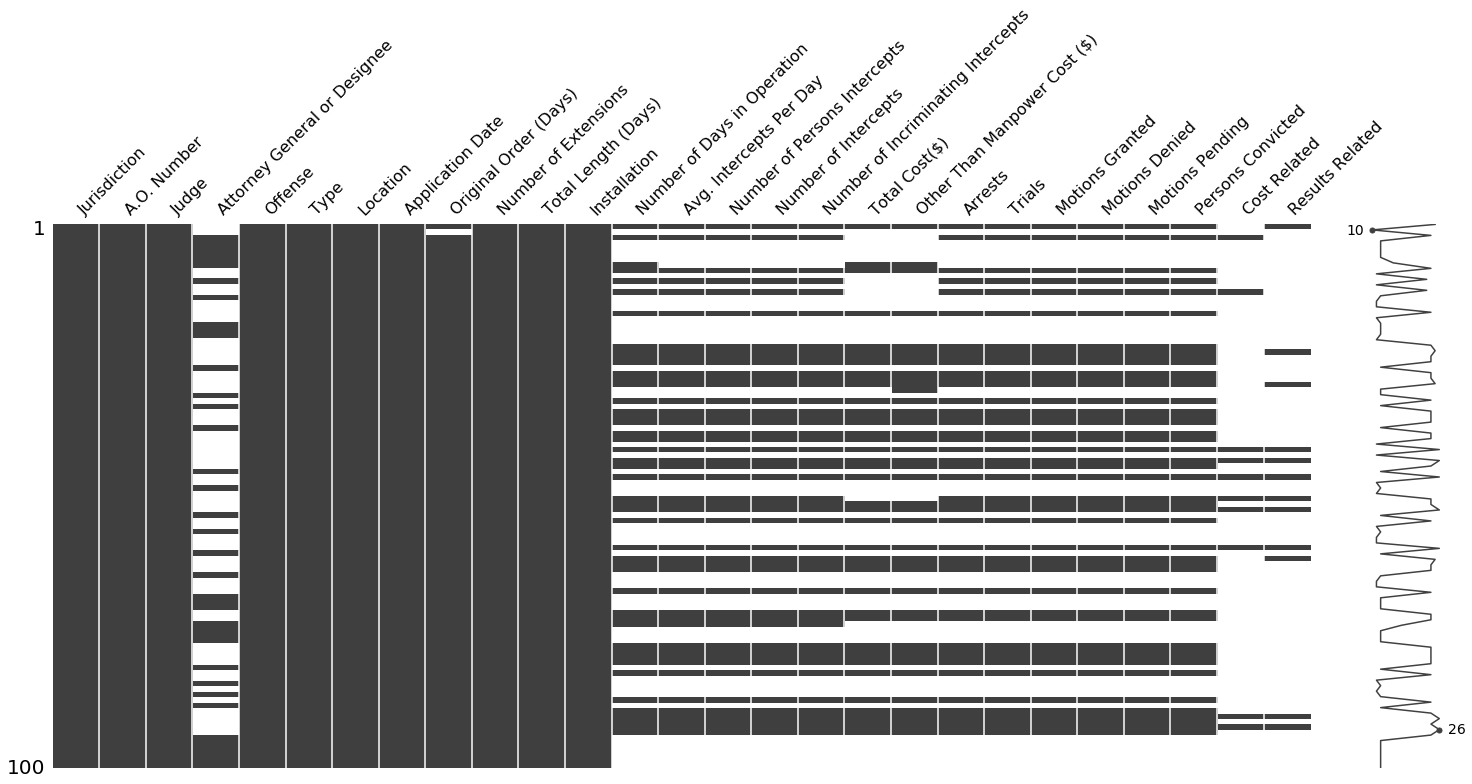

In [207]:
#Missing values matrix
msno.matrix(fed17.sample(100))

We only have consistent data for some of the variables. Many observations are missing values from _Number of Days in Operation_ to _Results Related_. What do these observations have in common?

In [208]:
#How many wiretaps were reported by the prosecutor?
fed17['Installation'].value_counts()

INSTALLED AND USED      1721
NO PROSECUTOR REPORT    1283
NEVER INSTALLED           22
Name: Installation, dtype: int64

In [209]:
# get rid of 'never installed'
fed17 = fed17[fed17.Installation != 'NEVER INSTALLED']

In [210]:
# very few records report AG or designee, so drop this column
fed17 = fed17.drop('Attorney General or Designee', axis=1)

In [211]:
# New dataframe: include only taps without prosecutor reports
fed_no = fed17.loc[fed17['Installation'] == 'NO PROSECUTOR REPORT']

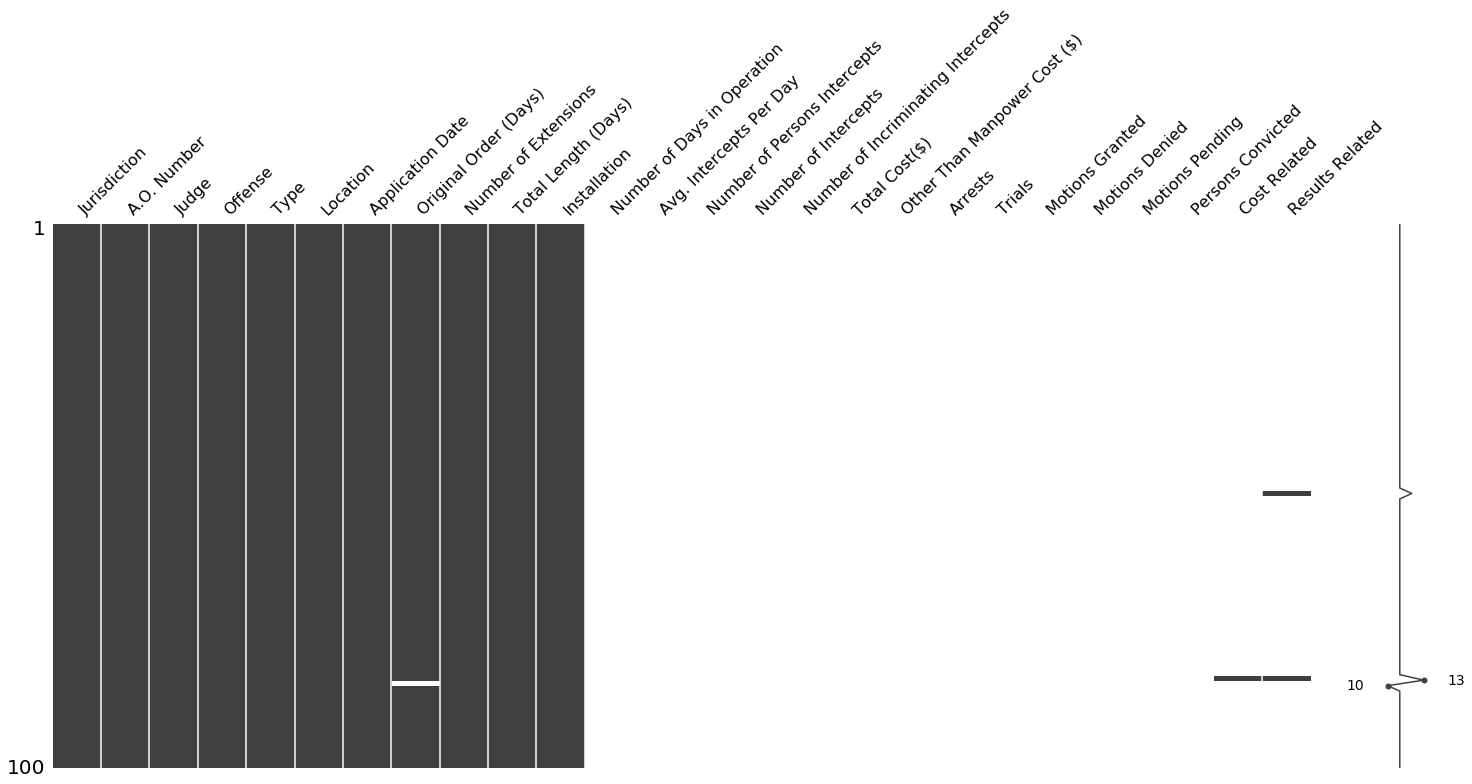

In [212]:
# check missing values
msno.matrix(fed_no.sample(100))

The missing values matrix above shows missing values for only the wiretaps that had no prosecutor report. The pattern of missing values in our full dataset stems from the fact that data for these variables were not submitted by the prosecutor, as the missing values makes clear. 

Among the jurisdictions where prosecutor reports were not submitted, which rank the highest?

In [213]:
fed_no['Jurisdiction'].value_counts()

TEXAS, SOUTHERN            86
CALIFORNIA, CENTRAL        85
ARIZONA                    82
COLORADO                   64
MISSOURI, EASTERN          51
NEW YORK, SOUTHERN         50
NEW JERSEY                 48
ILLINOIS, NORTHERN         40
CONNECTICUT                34
PENNSYLVANIA, WESTERN      30
LOUISIANA, EASTERN         29
CALIFORNIA, SOUTHERN       29
TEXAS, WESTERN             27
UTAH                       27
OKLAHOMA, WESTERN          27
DISTRICT OF COLUMBIA       21
MARYLAND                   20
FLORIDA, MIDDLE            20
KANSAS                     19
CALIFORNIA, NORTHERN       18
ARKANSAS, EASTERN          18
OHIO, SOUTHERN             17
SOUTH CAROLINA             16
INDIANA, SOUTHERN          16
NEW YORK, NORTHERN         15
PENNSYLVANIA, MIDDLE       15
FLORIDA, SOUTHERN          15
OREGON                     15
MISSISSIPPI, SOUTHERN      14
MISSOURI, WESTERN          14
                           ..
RHODE ISLAND                8
NORTH CAROLINA, WESTERN     7
NEVADA    

For each jurisdiction, what percentage of total wiretaps were not accompanied by a prosecutor report?

In [214]:
percent = fed17.groupby(['Jurisdiction'])['Installation'].value_counts(normalize=True, ascending = False) * 100

In [215]:
percent = percent.unstack(level=1)

In [216]:
percent = percent.fillna(0)
percent = percent.round(1)

In [217]:
percent.sort_values(by='NO PROSECUTOR REPORT', ascending=False)

Installation,INSTALLED AND USED,NO PROSECUTOR REPORT
Jurisdiction,,
"WEST VIRGINIA, NORTHERN",0.0,100.0
"PENNSYLVANIA, MIDDLE",11.8,88.2
"ALABAMA, MIDDLE",16.7,83.3
MONTANA,16.7,83.3
"NORTH CAROLINA, MIDDLE",20.0,80.0
"MICHIGAN, WESTERN",23.1,76.9
NEW JERSEY,23.8,76.2
"VIRGINIA, WESTERN",25.0,75.0
"NEW YORK, WESTERN",25.0,75.0


Now we know which jurisdictions are most likely not to submit prosecutor reports. Their low percentage of prosecutor reports might be due to a lack of personnel and resources, or perhaps because the prosecutors in those districts do not regard filing reports as a priority. The AO explains that reports may be missing because "some prosecutors may have delayed filing reports to avoid jeopardizing ongoing investigations. Some of the prosecutors’ reports require additional information to comply with reporting requirements or were received too late to include in this document. Information about these wiretaps should appear in future reports" (AO, 2017). 

Regardless of why reports are missing, it should be noted that comparing percentages across jurisdictions may be misleading, because some jurisdictions have dozens of records while others have only several. Northern WVA is on the top of the list for percent of reports not filed, but it only ordered four wiretaps. New Jersey is near the top, but it had 63 wiretaps.

In order to evaluate wiretaps in terms of cost, timespan, arrests, and other factors, we will have to look only at records for which a prosecutor report was filed. Before doing so, however, we will look at the variables that are not dependent on prosecutor reporting to see what insights we might derive.

   Jurisdiction<br>
   Judge<br>
   Location<br>
   Type<br>
   Offense<br>
   Application Date<br>
   Original Order (Days)<br>
   Number of Extensions<br>
   Total Length (Days)


In [218]:
# Number of wiretaps per jurisdiction
fed17['Jurisdiction'].value_counts()

CALIFORNIA, SOUTHERN       213
TEXAS, SOUTHERN            189
CALIFORNIA, CENTRAL        175
ARIZONA                    135
ILLINOIS, NORTHERN         131
NEW YORK, SOUTHERN         107
COLORADO                    94
TEXAS, WESTERN              91
MISSOURI, EASTERN           82
MARYLAND                    66
NEW JERSEY                  63
FLORIDA, SOUTHERN           59
CONNECTICUT                 53
OHIO, NORTHERN              52
LOUISIANA, EASTERN          52
INDIANA, SOUTHERN           50
OKLAHOMA, WESTERN           48
GEORGIA, NORTHERN           48
FLORIDA, MIDDLE             46
PENNSYLVANIA, WESTERN       45
UTAH                        45
DISTRICT OF COLUMBIA        44
NEW YORK, EASTERN           43
SOUTH CAROLINA              40
NEW MEXICO                  39
NEW YORK, NORTHERN          38
ARKANSAS, EASTERN           37
CALIFORNIA, NORTHERN        37
KANSAS                      34
OHIO, SOUTHERN              34
                          ... 
ALABAMA, NORTHERN           15
WEST VIR

In [219]:
#Number of wiretaps per offense
fed17['Offense'].value_counts()

NARCOTICS               1822
DRUGS - ILLEGAL          525
CONSPIRACY               422
RACKETEERING              33
$LAUNDERING               32
OTHER                     28
CORRUPTION                21
FRAUD                     20
MURDER                    18
DRUGS - PRESCRIPTION      15
FIREARMS                  13
BRIBERY                   11
POSSESSION                 8
GAMBLING                   6
EXTORTION                  5
KIDNAPPING                 5
ROBBERY                    3
TERRORISM                  2
IMMIGRATION                2
SMUGGLING                  2
LOANSHARKING               2
BOMBING                    1
COERCION                   1
THEFT                      1
USURY                      1
EMBEZZLEMENT               1
CIVIL RIGHTS               1
ASSAULT                    1
Name: Offense, dtype: int64

In [220]:
#Number of wiretaps by type
fed17['Type'].value_counts()

WC,TX          1247
WC             1152
TX              220
WC,TX,EO         59
WC,EO            59
EO               40
TX,EO            37
WC,WS            30
AP               28
WC,WO,TX         23
WC,OM,TX         19
WC,EE,TX,AP      17
OM                9
WC,TX,AP          8
WS                8
WC,OM             6
WC,OO,TX          5
EE                4
OO                4
WO,TX             4
WC,AP             3
-99               3
WC,WS,TX          3
OM,EO             2
WC,EE             2
OM,OO             2
TX,AP             2
WC,AP,EO          2
WO                2
WC,WO,EO          1
WS,TX             1
WC,WO             1
WC,OO             1
Name: Type, dtype: int64

Data Definitions for Wiretap Type:<br> 
WC = Cellular or Mobile Telephone (Wire)<br>
WS = Standard Telephone (Wire)<br>
WO = Other (Wire)<br>
OM = Microphone (Oral)<br>
OO = Other (Oral)<br>
AP = App (Electronic)<br>
ED = Digital Pager (Electronic)<br>
EE = Computer or E-Mail (Electronic)<br>
EF = Fax Machine (Electronic)<br>
EO = Other (Electronic)<br>
TX = Text Message (Electronic)<br>

Note: Unlike previous data analyzed by Landau and Duffy, it appears that the AO now distinguishes between wiretaps and bugs. 

Almost all wiretap orders are for cell phones and text messages. 

Does the number of wiretap orders vary by month?

In [221]:
fed17['Application Date'].value_counts()

03/27/2017    28
02/06/2017    21
09/23/2016    18
04/04/2017    18
11/03/2016    18
07/07/2017    17
03/17/2017    17
03/06/2017    16
05/05/2017    16
03/31/2017    15
08/25/2016    15
11/04/2016    15
05/12/2017    14
01/13/2017    14
08/23/2017    14
03/03/2017    14
07/06/2017    14
02/24/2017    14
04/05/2017    14
01/18/2017    14
06/19/2017    14
04/27/2017    14
06/12/2017    13
05/17/2017    13
02/22/2017    13
03/28/2017    13
04/06/2017    13
02/17/2017    13
04/20/2017    13
01/27/2017    13
              ..
02/03/2015     1
12/06/2012     1
11/16/2015     1
05/30/2014     1
10/18/2010     1
01/06/2015     1
01/13/2015     1
11/25/2015     1
02/27/2015     1
08/20/2013     1
03/23/2012     1
10/21/2010     1
09/09/2013     1
02/28/2012     1
09/25/2012     1
03/13/2015     1
07/21/2015     1
10/15/2015     1
11/06/2015     1
05/16/2013     1
11/04/2013     1
08/23/2012     1
03/10/2015     1
08/08/2012     1
06/01/2012     1
09/24/2014     1
12/31/2014     1
03/26/2017    

In [222]:
# want to get counts per month for just 2017
# first need to convert column to datetime format
fed17['Application Date'] = pd.to_datetime(fed17['Application Date'])

In [223]:
# extract year and month
fed17['year'] = pd.DatetimeIndex(fed17['Application Date']).year
fed17['month'] = pd.DatetimeIndex(fed17['Application Date']).month

In [224]:
plot = pd.DataFrame(fed17.loc[fed17['year'] == 2017].month.value_counts())
plot.reset_index(level=0, inplace=True)
plot = plot.sort_values(by='index', ascending=True)

In [225]:
plot = plot.rename(columns={"index": "month", "month": "count"})
plot.head()

,month,count
5,1.0,162
3,2.0,191
0,3.0,232
2,4.0,194
1,5.0,199


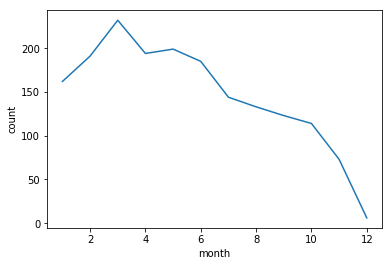

In [226]:
sns.lineplot(x='month', y = 'count', data=plot)

Wiretap orders peaked in March 2017 and then steadily declined through December.

In [227]:
#look at wiretaps ordered to investigate Conspiracy
fedconsp = fed17.loc[fed17['Offense']=='CONSPIRACY']

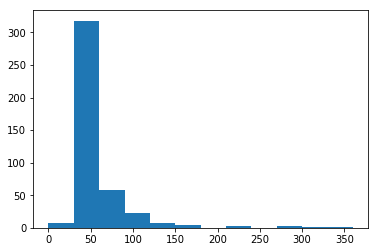

In [228]:
plt.hist(fedconsp['Total Length (Days)'], bins=12)
plt.show()

In [229]:
#look at wiretaps ordered to investigate Corruption
fedcorr = fed17.loc[fed17['Offense']=='CORRUPTION']
fedcorr

,Jurisdiction,A.O. Number,Judge,Offense,Type,Location,Application Date,Original Order (Days),Number of Extensions,Total Length (Days),...,Arrests,Trials,Motions Granted,Motions Denied,Motions Pending,Persons Convicted,Cost Related,Results Related,year,month
741,COLORADO,2017-73,BLACKBURN,CORRUPTION,"WC,TX",D,2017-02-23,30.0,0.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,2.0
742,COLORADO,2017-74,BLACKBURN,CORRUPTION,WC,D,2017-03-24,30.0,0.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,3.0
744,COLORADO,2017-76,KRIEGER,CORRUPTION,WC,D,2017-06-02,30.0,0.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,6.0
745,COLORADO,2017-77,BLACKBURN,CORRUPTION,"WC,TX",D,2017-05-22,30.0,0.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,5.0
1077,"ILLINOIS, NORTHERN",2011-69,ST. EVE,CORRUPTION,WC,D,2010-10-18,30.0,5.0,180.0,...,0.0,0.0,0.0,0.0,0.0,0.0,RELATED TO NO. 2011-70,RELATED TO NO. 2011-70,2010.0,10.0
1078,"ILLINOIS, NORTHERN",2011-70,KENDALL,CORRUPTION,WC,D,2010-09-24,30.0,6.0,210.0,...,7.0,1.0,0.0,0.0,0.0,8.0,NaN,NaN,2010.0,9.0
1167,"ILLINOIS, NORTHERN",2017-83,CASTILLO,CORRUPTION,WC,D,2017-02-28,30.0,3.0,120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2017.0,2.0
1176,"ILLINOIS, NORTHERN",2017-92,CASTILLO,CORRUPTION,"WC,TX",D,2017-03-31,30.0,2.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,3.0
1834,NEW JERSEY,2017-21,MCNULTY,CORRUPTION,"WC,TX",D,2017-07-21,30.0,1.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,7.0
1835,NEW JERSEY,2017-22,MCNULTY,CORRUPTION,"WC,TX",D,2017-07-21,30.0,1.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,7.0


In [230]:
#New dataframe: keep only records that were reported
fed_rep = fed17.loc[fed17['Installation'] == 'INSTALLED AND USED']

In [231]:
fed_rep.describe()

,Original Order (Days),Number of Extensions,Total Length (Days),Number of Days in Operation,Avg. Intercepts Per Day,Arrests,Trials,Motions Granted,Motions Denied,Motions Pending,Persons Convicted,year,month
count,1721.000000,1721.000000,1721.000000,1714.000000,1684.000000,1620.000000,1606.000000,1608.000000,1608.000000,1608.000000,1606.000000,1721.000000,1721.000000
mean,29.987798,0.534573,46.024985,41.931155,415.097981,2.375926,0.018057,0.047264,0.024254,0.001244,0.365504,2016.051714,6.335851
std,0.506208,1.070805,32.134238,33.126779,12561.570722,7.388875,0.320121,1.238364,0.643794,0.035256,2.953265,1.154465,3.305376
min,9.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,1.000000
25%,30.000000,0.000000,30.000000,29.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,3.000000
50%,30.000000,0.000000,30.000000,30.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,6.000000
75%,30.000000,1.000000,60.000000,58.000000,116.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,9.000000
max,30.000000,16.000000,510.000000,510.000000,515477.000000,130.000000,11.000000,40.000000,25.000000,1.000000,70.000000,2017.000000,12.000000


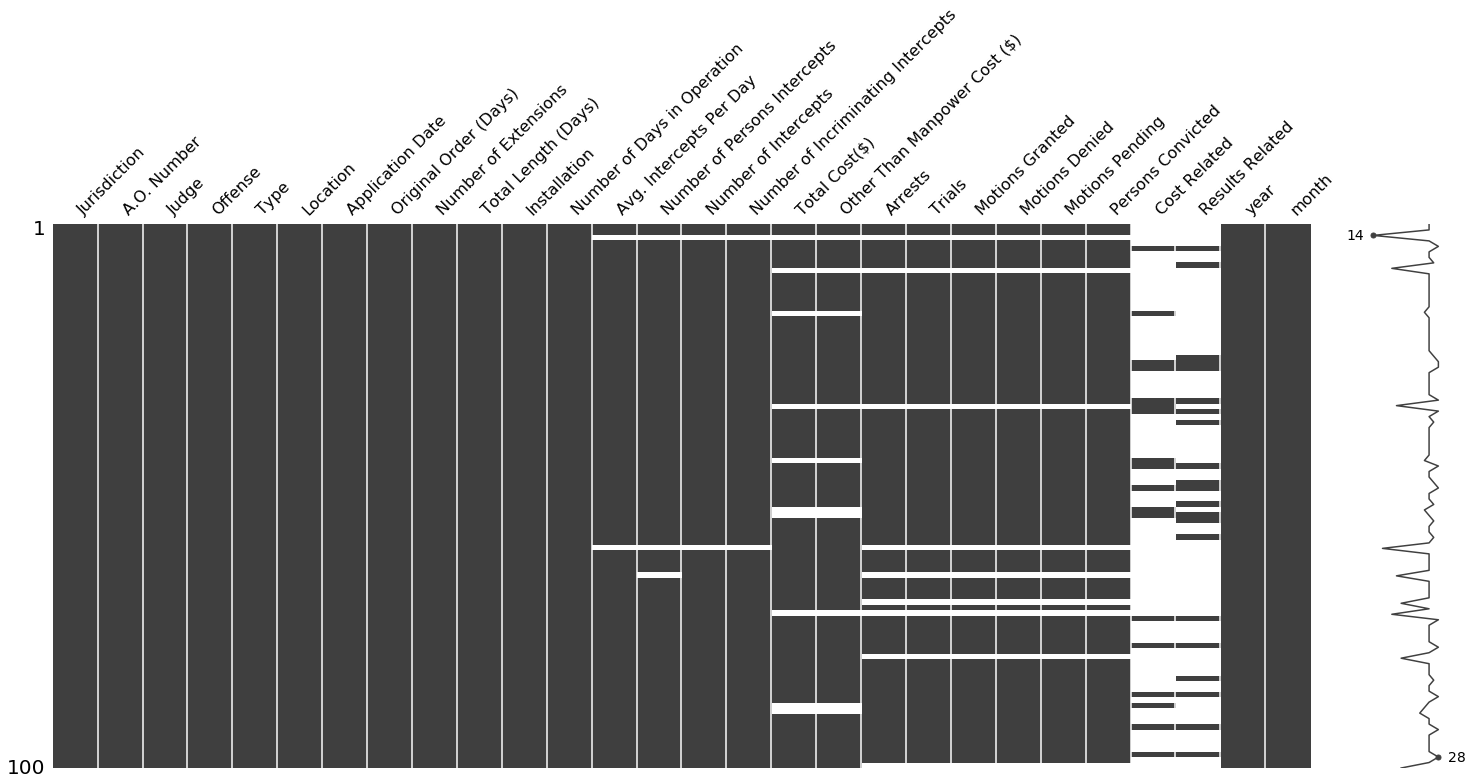

In [232]:
msno.matrix(fed_rep.sample(100))

Data still patchy in some places, but for the most part we have complete records

In [233]:
fed_rep.groupby('Offense')['Total Length (Days)'].mean()

Offense
$LAUNDERING         48.461538
BRIBERY             66.666667
CIVIL RIGHTS        30.000000
COERCION            90.000000
CONSPIRACY          46.480519
CORRUPTION         132.000000
DRUGS - ILLEGAL     73.333333
EMBEZZLEMENT        30.000000
EXTORTION          120.000000
FIREARMS            37.500000
FRAUD               62.142857
GAMBLING           108.000000
IMMIGRATION         30.000000
KIDNAPPING          30.000000
LOANSHARKING        75.000000
MURDER              76.153846
NARCOTICS           44.137475
OTHER               51.000000
POSSESSION          52.500000
RACKETEERING        47.500000
ROBBERY             30.000000
SMUGGLING           30.000000
THEFT               60.000000
USURY               60.000000
Name: Total Length (Days), dtype: float64

In [234]:
fed_rep['Total Cost($)'] = fed_rep['Total Cost($)'].str.replace(',','')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [235]:
off_cost = fed_rep[['Offense', 'Total Cost($)']]

In [236]:
off_cost = off_cost.dropna()

In [237]:
off_cost['Total Cost($)'] = off_cost['Total Cost($)'].astype(int)
off_cost.groupby('Offense')['Total Cost($)'].mean()

Offense
$LAUNDERING        142438.181818
BRIBERY             71421.444444
CIVIL RIGHTS         3807.000000
COERCION           263533.000000
CONSPIRACY          53860.472222
CORRUPTION         223997.400000
DRUGS - ILLEGAL    470210.437500
EMBEZZLEMENT          300.000000
EXTORTION          343881.500000
FIREARMS            70860.250000
FRAUD               30195.857143
GAMBLING            19712.000000
KIDNAPPING         106873.000000
LOANSHARKING        50961.000000
MURDER             125225.461538
NARCOTICS           59169.955797
OTHER               23087.500000
POSSESSION          38112.500000
RACKETEERING        85462.600000
ROBBERY             12752.333333
SMUGGLING               0.000000
THEFT               69748.000000
USURY              103534.000000
Name: Total Cost($), dtype: float64

In [238]:
fed_rep.groupby(['Type'])['Total Length (Days)'].mean()

Type
AP           30.000000
EE           50.000000
EO           45.000000
OM           60.000000
OM,EO        30.000000
OM,OO        60.000000
OO           30.000000
TX           54.294479
TX,AP        75.000000
TX,EO        38.333333
WC           46.977364
WC,EE        45.000000
WC,EO        54.782609
WC,OM        37.500000
WC,OM,TX     19.500000
WC,OO        30.000000
WC,TX        42.537994
WC,TX,EO     37.500000
WC,WO,EO     30.000000
WC,WS        48.000000
WC,WS,TX     30.000000
WO,TX        90.000000
WS          240.000000
Name: Total Length (Days), dtype: float64

In [239]:
fed_rep.to_csv('fed_rep.csv')

### State Courts

In [240]:
# read state intercept data
state17 = pd.read_csv('statewire_2017.csv')
state17.head()

,State,Jurisdiction,A.O. Number,Judge,Prosecutor,Offense,Type,Location,Application Date,Original Order (Days),...,Total Cost($),Other Than Manpower Cost ($),Arrests,Trials,Motions Granted,Motions Denied,Motions Pending,Persons Convicted,Cost Related,Results Related
0,ALASKA,3rd Judicial District,2017-1,MOTYKA,LINDEMUTH,MURDER,"WC,TX",D,05/15/2017,30.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALASKA,3rd Judicial District,2017-2,MOTYKA,LINDEMUTH,MURDER,"WC,TX",D,05/15/2017,30.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALASKA,3rd Judicial District,2017-3,MOTYKA,LINDEMUTH,MURDER,"WC,TX",D,05/15/2017,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALASKA,3rd Judicial District,2017-4,MOTYKA,LINDEMUTH,MURDER,"WC,TX",D,05/15/2017,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALASKA,4th Judicial District,2017-1,MACDONALD,LINDEMUTH,MURDER,"WC,TX",D,02/24/2017,30.0,...,"60,744","20,000",3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN


In [241]:
# Number of wiretaps per offense
state17['Offense'].value_counts()

NARCOTICS          1224
DRUGS - ILLEGAL     263
MURDER              192
OTHER               128
CONSPIRACY          102
RACKETEERING         83
GAMBLING             27
CORRUPTION           24
LARCENY              24
$LAUNDERING           3
BRIBERY               3
ASSAULT               3
ARSON                 2
FORGERY               1
INTIMIDATION          1
FIREARMS              1
POSSESSION            1
TERRORISM             1
FRAUD                 1
Name: Offense, dtype: int64

In [242]:
# Number of wiretaps per state
state17['State'].value_counts()

CALIFORNIA        610
NEW YORK          550
COLORADO          139
NEVADA            139
NORTH CAROLINA    109
NEW JERSEY        103
FLORIDA            86
PENNSYLVANIA       75
ILLINOIS           46
ARIZONA            39
GEORGIA            31
TENNESSEE          28
MASSACHUSETTS      28
MARYLAND           25
OHIO               10
MISSISSIPPI        10
INDIANA             9
TEXAS               8
ALASKA              7
WYOMING             7
LOUISIANA           7
WISCONSIN           6
OKLAHOMA            4
UTAH                3
HAWAII              2
NEBRASKA            2
IDAHO               2
VIRGINIA            2
KANSAS              1
SOUTH CAROLINA      1
Name: State, dtype: int64

In [243]:
# Number of wiretaps per jurisdiction
state17['Jurisdiction'].value_counts()

LOS ANGELES                                        225
NEW YORK                                           152
CLARK                                              139
SUFFOLK                                            130
RIVERSIDE                                          118
QUEENS                                              98
2ND JUDICIAL DISTRICT (DENVER)                      97
Supreme Court Appellate Division 2nd Department     62
SUPERIOR COURT OF PENNSYLVANIA                      54
SAN JOAQUIN                                         48
KINGS                                               41
SAN BERNARDINO                                      38
MERCED                                              36
18TH JUDICIAL CIRCUIT (BREVARD/SEMINOLE)            30
SAN DIEGO                                           28
GUILFORD                                            28
COOK                                                28
20TH JUDICIAL DISTRICT (DAVIDSON)                   26
NASSAU    

## Maps

In [244]:
#load mapping libraries
import geopandas as gpd
import pysal as ps
from pysal.contrib.viz import mapping as maps
import palettable as pltt
from seaborn import palplot

In [338]:
#create link to file directory
jur_dir = 'US_District_Court_Jurisdictions/'
#call file
court_jur = jur_dir + 'US_District_Court_Jurisdictions.shp'
#read shapefile with geopandas
jur = gpd.read_file(court_jur)
jur.set_index('DISTRICT')

,FID,ABBR,SQ_Miles,Shape_Leng,Shape_Area,District_N,Shape__Are,Shape__Len,geometry
DISTRICT,,,,,,,,,
ALABAMA MIDDLE,1,ALM,1.557104e+04,9.918902,3.851034,11,5.634653e+10,1.200787e+06,"POLYGON ((-85.3434143069999 33.4967117310001, ..."
ALABAMA NORTHERN,2,ALN,2.279241e+04,12.526683,5.752874,11,8.590670e+10,1.525150e+06,"POLYGON ((-88.1822509769999 35.0087089540001, ..."
ALABAMA SOUTHERN,3,ALS,3.672870e+04,14.291408,3.267182,11,4.755904e+10,1.725692e+06,"(POLYGON ((-88.0563507079999 30.1896820070001,..."
ALASKA,4,AK,2.130451e+07,787.366223,279.696379,9,8.146772e+12,1.146259e+08,"(POLYGON ((-179.098083496 51.3043937680002, -1..."
ARIZONA,5,AZ,1.140598e+05,23.752602,28.930993,9,4.342576e+11,2.888358e+06,"POLYGON ((-110.539299011 37.004226685, -110.47..."
ARKANSAS EASTERN,6,ARE,2.887509e+04,20.282134,7.391100,8,1.119305e+11,2.444057e+06,"POLYGON ((-90.6844940189999 36.4965057370001, ..."
ARKANSAS WESTERN,7,ARW,2.429224e+04,17.572698,6.190137,8,9.333129e+10,2.130771e+06,"POLYGON ((-93.3690338129999 36.496860504, -93...."
CALIFORNIA CENTRAL,8,CAC,7.773755e+04,26.141797,10.235889,9,1.540900e+11,3.109362e+06,"(POLYGON ((-118.571754456 33.0296134950001, -1..."
CALIFORNIA EASTERN,9,CAE,9.178595e+04,32.204502,23.632805,9,3.745997e+11,4.011210e+06,"(POLYGON ((-121.839935303 38.0620040890002, -1..."


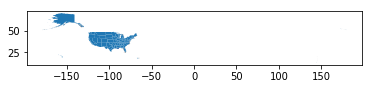

In [339]:
jur.plot()

In [340]:
#remove jurisdictions that cause scaling problems when plotting
jur = jur[jur.DISTRICT != 'GUAM']
jur = jur[jur.DISTRICT != 'ALASKA']
jur = jur[jur.DISTRICT != 'NORTHERN MARIANA ISLANDS']
jur = jur[jur.DISTRICT != 'VIRGIN ISLANDS']
jur = jur[jur.DISTRICT != 'HAWAII']
jur = jur[jur.DISTRICT != 'PUERTO RICO']
jur = jur[jur.DISTRICT != 'BERMUDA']

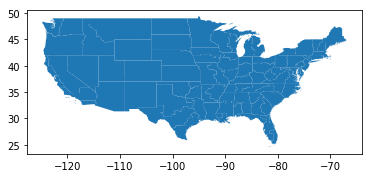

In [341]:
jur.plot()

In [342]:
#check dataframe and projection
jur.crs

{'init': 'epsg:4326'}

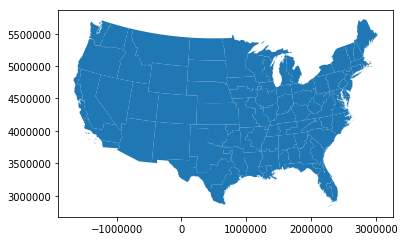

In [343]:
jur.to_crs("+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs").plot()

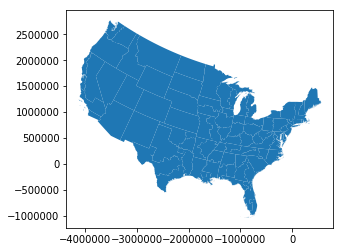

In [344]:
jur.to_crs({'init': 'epsg:2805'}).plot()

In [345]:
jur.to_crs({'init': 'epsg:3395'}).plot()

In [348]:
jur = jur.to_crs("+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

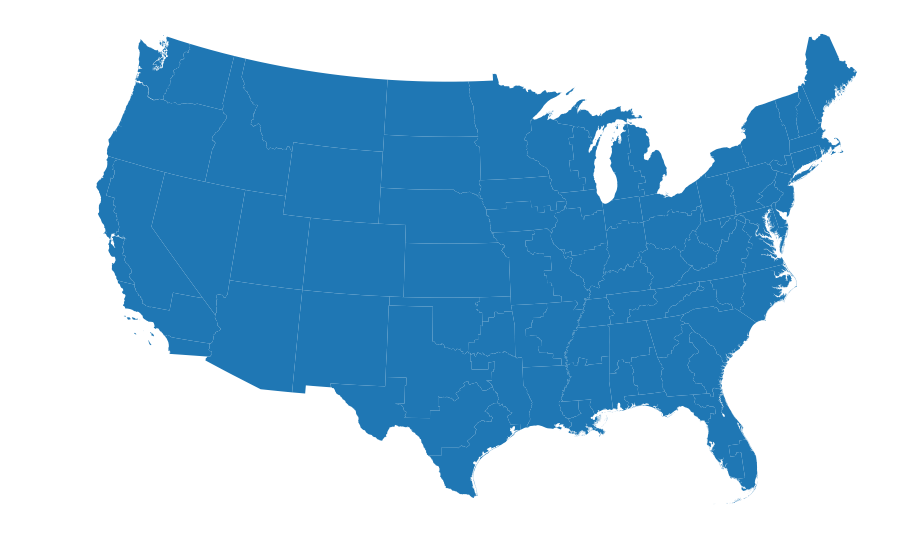

In [349]:
#Set up figure and axis with different size
f, ax = plt.subplots(1, figsize=(15,15))
#Add layer of polygons on the axis
jur.plot(ax=ax)
#Remove axis
ax.set_axis_off()
#Display
plt.show()

In [350]:
fed17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 27 columns):
Jurisdiction                          3026 non-null object
A.O. Number                           3026 non-null object
Judge                                 3026 non-null object
Attorney General or Designee          992 non-null object
Offense                               3024 non-null object
Type                                  3026 non-null object
Location                              3026 non-null object
Application Date                      3026 non-null object
Original Order (Days)                 3019 non-null float64
Number of Extensions                  3026 non-null float64
Total Length (Days)                   3026 non-null float64
Installation                          3026 non-null object
Number of Days in Operation           1718 non-null float64
Avg. Intercepts Per Day               1688 non-null float64
Number of Persons Intercepts          1686 non-null object
Numb

In [351]:
jur.reset_index()

,index,FID,ABBR,DISTRICT,SQ_Miles,Shape_Leng,Shape_Area,District_N,Shape__Are,Shape__Len,geometry
0,0,1,ALM,ALABAMA MIDDLE,15571.036,9.918902,3.851034,11,5.634653e+10,1.200787e+06,"POLYGON ((1773231.512352993 3791067.418154831,..."
1,1,2,ALN,ALABAMA NORTHERN,22792.411,12.526683,5.752874,11,8.590670e+10,1.525150e+06,"POLYGON ((1489037.117957541 3927953.039866412,..."
2,2,3,ALS,ALABAMA SOUTHERN,36728.698,14.291408,3.267182,11,4.755904e+10,1.725692e+06,(POLYGON ((1556659.714021643 3390941.689811798...
3,4,5,AZ,ARIZONA,114059.824,23.752602,28.930993,9,4.342576e+11,2.888358e+06,POLYGON ((-528566.6197332991 4158168.673864642...
4,5,6,ARE,ARKANSAS EASTERN,28875.088,20.282134,7.391100,8,1.119305e+11,2.444057e+06,"POLYGON ((1245497.465320358 4071327.816416613,..."
5,6,7,ARW,ARKANSAS WESTERN,24292.235,17.572698,6.190137,8,9.333129e+10,2.130771e+06,"POLYGON ((1004541.982884315 4053833.637892094,..."
6,7,8,CAC,CALIFORNIA CENTRAL,77737.552,26.141797,10.235889,9,1.540900e+11,3.109362e+06,(POLYGON ((-1341965.065576062 3830213.72658080...
7,8,9,CAE,CALIFORNIA EASTERN,91785.949,32.204502,23.632805,9,3.745997e+11,4.011210e+06,(POLYGON ((-1515460.750063294 4468009.65215676...
8,9,10,CAN,CALIFORNIA NORTHERN,26734.821,29.120485,5.579357,9,8.854351e+10,3.691538e+06,(POLYGON ((-1629578.215244083 4454734.98264076...
9,10,11,CAS,CALIFORNIA SOUTHERN,13029.776,8.844054,2.191518,9,3.239572e+10,1.029109e+06,(POLYGON ((-1217650.238149857 3777528.40702268...


In [352]:
print(jur.DISTRICT.unique())

['ALABAMA MIDDLE' 'ALABAMA NORTHERN' 'ALABAMA SOUTHERN' 'ARIZONA'
 'ARKANSAS EASTERN' 'ARKANSAS WESTERN' 'CALIFORNIA CENTRAL'
 'CALIFORNIA EASTERN' 'CALIFORNIA NORTHERN' 'CALIFORNIA SOUTHERN'
 'COLORADO' 'CONNECTICUT' 'DELAWARE' 'DISTRICT OF COLUMBIA'
 'FLORIDA MIDDLE' 'FLORIDA NORTHERN' 'FLORIDA SOUTHERN' 'GEORGIA MIDDLE'
 'GEORGIA NORTHERN' 'GEORGIA SOUTHERN' 'IDAHO' 'ILLINOIS CENTRAL'
 'ILLINOIS SOUTHERN' 'INDIANA NORTHERN' 'INDIANA SOUTHERN' 'IOWA NORTHERN'
 'IOWA SOUTHERN' 'KANSAS' 'KENTUCKY EASTERN' 'KENTUCKY WESTERN'
 'LOUISIANA EASTERN' 'LOUISIANA MIDDLE' 'LOUISIANA WESTERN' 'MAINE'
 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN EASTERN' 'MICHIGAN WESTERN'
 'MINNESOTA' 'MISSISSIPPI NORTHERN' 'MISSISSIPPI SOUTHERN'
 'MISSOURI EASTERN' 'MISSOURI WESTERN' 'MONTANA' 'NEBRASKA' 'NEVADA'
 'NEW HAMPSHIRE' 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK EASTERN'
 'NEW YORK NORTHERN' 'NEW YORK SOUTHERN' 'NEW YORK WESTERN'
 'NORTH CAROLINA EASTERN' 'NORTH CAROLINA MIDDLE' 'NORTH CAROLINA WESTERN'
 'NORTH DAK

In [353]:
print(fed17.Jurisdiction.unique())

['ALABAMA, MIDDLE' 'ALABAMA, NORTHERN' 'ALABAMA, SOUTHERN' 'ARIZONA'
 'ARKANSAS, EASTERN' 'ARKANSAS, WESTERN' 'CALIFORNIA, CENTRAL'
 'CALIFORNIA, EASTERN' 'CALIFORNIA, NORTHERN' 'CALIFORNIA, SOUTHERN'
 'COLORADO' 'CONNECTICUT' 'DELAWARE' 'DISTRICT OF COLUMBIA'
 'FLORIDA, MIDDLE' 'FLORIDA, NORTHERN' 'FLORIDA, SOUTHERN'
 'GEORGIA, MIDDLE' 'GEORGIA, NORTHERN' 'GEORGIA, SOUTHERN' 'HAWAII'
 'IDAHO' 'ILLINOIS, CENTRAL' 'ILLINOIS, NORTHERN' 'ILLINOIS, SOUTHERN'
 'INDIANA, NORTHERN' 'INDIANA, SOUTHERN' 'IOWA, NORTHERN' 'IOWA, SOUTHERN'
 'KANSAS' 'KENTUCKY, EASTERN' 'KENTUCKY, WESTERN' 'LOUISIANA, EASTERN'
 'LOUISIANA, MIDDLE' 'LOUISIANA, WESTERN' 'MAINE' 'MARYLAND'
 'MASSACHUSETTS' 'MICHIGAN, EASTERN' 'MICHIGAN, WESTERN' 'MINNESOTA'
 'MISSISSIPPI, NORTHERN' 'MISSISSIPPI, SOUTHERN' 'MISSOURI, EASTERN'
 'MISSOURI, WESTERN' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE'
 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK, EASTERN' 'NEW YORK, NORTHERN'
 'NEW YORK, SOUTHERN' 'NEW YORK, WESTERN' 'NORTH CAROLINA, EA

In [354]:
#I want to merge shapefiles with Federal Wiretap reports on Jurisdiction/District. 
#The problem is that there are inconsistencies in the spellings.

#I will modify the shapefile rather than fed17, because it is likely that I will work with 
#wiretap files from other years that are formatted the same as fed17. Better to modify the 
#shapefile once so that its formatting is consistent with the other files in the future. 

#I need to replace each space in the shapefile with a comma. 

In [355]:
jur['DISTRICT'] = jur['DISTRICT'].str.replace(' ', ', ')

In [356]:
print(jur.DISTRICT.unique())

['ALABAMA, MIDDLE' 'ALABAMA, NORTHERN' 'ALABAMA, SOUTHERN' 'ARIZONA'
 'ARKANSAS, EASTERN' 'ARKANSAS, WESTERN' 'CALIFORNIA, CENTRAL'
 'CALIFORNIA, EASTERN' 'CALIFORNIA, NORTHERN' 'CALIFORNIA, SOUTHERN'
 'COLORADO' 'CONNECTICUT' 'DELAWARE' 'DISTRICT, OF, COLUMBIA'
 'FLORIDA, MIDDLE' 'FLORIDA, NORTHERN' 'FLORIDA, SOUTHERN'
 'GEORGIA, MIDDLE' 'GEORGIA, NORTHERN' 'GEORGIA, SOUTHERN' 'IDAHO'
 'ILLINOIS, CENTRAL' 'ILLINOIS, SOUTHERN' 'INDIANA, NORTHERN'
 'INDIANA, SOUTHERN' 'IOWA, NORTHERN' 'IOWA, SOUTHERN' 'KANSAS'
 'KENTUCKY, EASTERN' 'KENTUCKY, WESTERN' 'LOUISIANA, EASTERN'
 'LOUISIANA, MIDDLE' 'LOUISIANA, WESTERN' 'MAINE' 'MARYLAND'
 'MASSACHUSETTS' 'MICHIGAN, EASTERN' 'MICHIGAN, WESTERN' 'MINNESOTA'
 'MISSISSIPPI, NORTHERN' 'MISSISSIPPI, SOUTHERN' 'MISSOURI, EASTERN'
 'MISSOURI, WESTERN' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW, HAMPSHIRE'
 'NEW, JERSEY' 'NEW, MEXICO' 'NEW, YORK, EASTERN' 'NEW, YORK, NORTHERN'
 'NEW, YORK, SOUTHERN' 'NEW, YORK, WESTERN' 'NORTH, CAROLINA, EASTERN'
 'NORTH, CARO

In [357]:
#The above command caused problems for two-word state names

#New York
jur['DISTRICT'] = jur['DISTRICT'].str.replace('W, Y', 'W Y')
#New Hampshire
jur['DISTRICT'] = jur['DISTRICT'].str.replace('W, H', 'W H')
#New Jersey
jur['DISTRICT'] = jur['DISTRICT'].str.replace('W, J', 'W J')
#West Virginia
jur['DISTRICT'] = jur['DISTRICT'].str.replace('T, V', 'T V')
#North Carolina, South Carolina
jur['DISTRICT'] = jur['DISTRICT'].str.replace('H, C', 'H C')
#New Mexico
jur['DISTRICT'] = jur['DISTRICT'].str.replace('W, M', 'W M')
#North Dakota, South Dakota
jur['DISTRICT'] = jur['DISTRICT'].str.replace('H, D', 'H D')
#District of Columbia
jur['DISTRICT'] = jur['DISTRICT'].str.replace('T, OF, C', 'T OF C')
#Rhode Island
jur['DISTRICT'] = jur['DISTRICT'].str.replace('E, I', 'E I')

In [358]:
print(jur.DISTRICT.unique())

['ALABAMA, MIDDLE' 'ALABAMA, NORTHERN' 'ALABAMA, SOUTHERN' 'ARIZONA'
 'ARKANSAS, EASTERN' 'ARKANSAS, WESTERN' 'CALIFORNIA, CENTRAL'
 'CALIFORNIA, EASTERN' 'CALIFORNIA, NORTHERN' 'CALIFORNIA, SOUTHERN'
 'COLORADO' 'CONNECTICUT' 'DELAWARE' 'DISTRICT OF COLUMBIA'
 'FLORIDA, MIDDLE' 'FLORIDA, NORTHERN' 'FLORIDA, SOUTHERN'
 'GEORGIA, MIDDLE' 'GEORGIA, NORTHERN' 'GEORGIA, SOUTHERN' 'IDAHO'
 'ILLINOIS, CENTRAL' 'ILLINOIS, SOUTHERN' 'INDIANA, NORTHERN'
 'INDIANA, SOUTHERN' 'IOWA, NORTHERN' 'IOWA, SOUTHERN' 'KANSAS'
 'KENTUCKY, EASTERN' 'KENTUCKY, WESTERN' 'LOUISIANA, EASTERN'
 'LOUISIANA, MIDDLE' 'LOUISIANA, WESTERN' 'MAINE' 'MARYLAND'
 'MASSACHUSETTS' 'MICHIGAN, EASTERN' 'MICHIGAN, WESTERN' 'MINNESOTA'
 'MISSISSIPPI, NORTHERN' 'MISSISSIPPI, SOUTHERN' 'MISSOURI, EASTERN'
 'MISSOURI, WESTERN' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE'
 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK, EASTERN' 'NEW YORK, NORTHERN'
 'NEW YORK, SOUTHERN' 'NEW YORK, WESTERN' 'NORTH CAROLINA, EASTERN'
 'NORTH CAROLINA, MIDDL

In [359]:
jur['DISTRICT'] = jur['DISTRICT'].str.replace('T,H', 'TH')
jur['DISTRICT'] = jur['DISTRICT'].str.replace('E,W', 'EW')
jur['DISTRICT'] = jur['DISTRICT'].str.replace('S,T', 'ST')
print(jur.DISTRICT.unique())

['ALABAMA, MIDDLE' 'ALABAMA, NORTHERN' 'ALABAMA, SOUTHERN' 'ARIZONA'
 'ARKANSAS, EASTERN' 'ARKANSAS, WESTERN' 'CALIFORNIA, CENTRAL'
 'CALIFORNIA, EASTERN' 'CALIFORNIA, NORTHERN' 'CALIFORNIA, SOUTHERN'
 'COLORADO' 'CONNECTICUT' 'DELAWARE' 'DISTRICT OF COLUMBIA'
 'FLORIDA, MIDDLE' 'FLORIDA, NORTHERN' 'FLORIDA, SOUTHERN'
 'GEORGIA, MIDDLE' 'GEORGIA, NORTHERN' 'GEORGIA, SOUTHERN' 'IDAHO'
 'ILLINOIS, CENTRAL' 'ILLINOIS, SOUTHERN' 'INDIANA, NORTHERN'
 'INDIANA, SOUTHERN' 'IOWA, NORTHERN' 'IOWA, SOUTHERN' 'KANSAS'
 'KENTUCKY, EASTERN' 'KENTUCKY, WESTERN' 'LOUISIANA, EASTERN'
 'LOUISIANA, MIDDLE' 'LOUISIANA, WESTERN' 'MAINE' 'MARYLAND'
 'MASSACHUSETTS' 'MICHIGAN, EASTERN' 'MICHIGAN, WESTERN' 'MINNESOTA'
 'MISSISSIPPI, NORTHERN' 'MISSISSIPPI, SOUTHERN' 'MISSOURI, EASTERN'
 'MISSOURI, WESTERN' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE'
 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK, EASTERN' 'NEW YORK, NORTHERN'
 'NEW YORK, SOUTHERN' 'NEW YORK, WESTERN' 'NORTH CAROLINA, EASTERN'
 'NORTH CAROLINA, MIDDL

In [360]:
#drop records from fed17 for just contiguous US

fed_jur17 = fed17[fed17.Jurisdiction != 'ALASKA']
fed_jur17 = fed_jur17[fed_jur17.Jurisdiction != 'HAWAII']
fed_jur17 = fed_jur17[fed_jur17.Jurisdiction != 'RHODE ISLAND']
fed_jur17 = fed_jur17[fed_jur17.Jurisdiction != 'PUERTO RICO']
fed_jur17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2973 entries, 0 to 3026
Data columns (total 27 columns):
Jurisdiction                          2972 non-null object
A.O. Number                           2972 non-null object
Judge                                 2972 non-null object
Attorney General or Designee          971 non-null object
Offense                               2970 non-null object
Type                                  2972 non-null object
Location                              2972 non-null object
Application Date                      2972 non-null object
Original Order (Days)                 2965 non-null float64
Number of Extensions                  2972 non-null float64
Total Length (Days)                   2972 non-null float64
Installation                          2972 non-null object
Number of Days in Operation           1689 non-null float64
Avg. Intercepts Per Day               1661 non-null float64
Number of Persons Intercepts          1662 non-null object
Numb

In [361]:
jur_tap = pd.merge(fed_jur17, jur, left_on= 'Jurisdiction', right_on= 'DISTRICT')

In [362]:
jur_tap.head()

,Jurisdiction,A.O. Number,Judge,Attorney General or Designee,Offense,Type,Location,Application Date,Original Order (Days),Number of Extensions,...,FID,ABBR,DISTRICT,SQ_Miles,Shape_Leng,Shape_Area,District_N,Shape__Are,Shape__Len,geometry
0,"ALABAMA, MIDDLE",2017-1,"ALBRITTON, III",NaN,NARCOTICS,WC,D,02/28/2017,30.0,0.0,...,1,ALM,"ALABAMA, MIDDLE",15571.036,9.918902,3.851034,11,5.634653e+10,1.200787e+06,"POLYGON ((1773231.512352993 3791067.418154831,..."
1,"ALABAMA, MIDDLE",2017-2,"ALBRITTON, III",BLANCO,DRUGS - ILLEGAL,"WC,TX",D,04/05/2017,30.0,1.0,...,1,ALM,"ALABAMA, MIDDLE",15571.036,9.918902,3.851034,11,5.634653e+10,1.200787e+06,"POLYGON ((1773231.512352993 3791067.418154831,..."
2,"ALABAMA, MIDDLE",2017-3,"ALBRITTON, III",BLANCO,DRUGS - ILLEGAL,"WC,TX",D,02/28/2017,30.0,0.0,...,1,ALM,"ALABAMA, MIDDLE",15571.036,9.918902,3.851034,11,5.634653e+10,1.200787e+06,"POLYGON ((1773231.512352993 3791067.418154831,..."
3,"ALABAMA, MIDDLE",2017-4,"ALBRITTON, III",BLANCO,DRUGS - ILLEGAL,"WC,TX",D,03/07/2017,30.0,1.0,...,1,ALM,"ALABAMA, MIDDLE",15571.036,9.918902,3.851034,11,5.634653e+10,1.200787e+06,"POLYGON ((1773231.512352993 3791067.418154831,..."
4,"ALABAMA, MIDDLE",2017-5,"ALBRITTON, III",BLANCO,DRUGS - ILLEGAL,"WC,TX",D,04/05/2017,30.0,0.0,...,1,ALM,"ALABAMA, MIDDLE",15571.036,9.918902,3.851034,11,5.634653e+10,1.200787e+06,"POLYGON ((1773231.512352993 3791067.418154831,..."


In [363]:
jur_tap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2972 entries, 0 to 2971
Data columns (total 37 columns):
Jurisdiction                          2972 non-null object
A.O. Number                           2972 non-null object
Judge                                 2972 non-null object
Attorney General or Designee          971 non-null object
Offense                               2970 non-null object
Type                                  2972 non-null object
Location                              2972 non-null object
Application Date                      2972 non-null object
Original Order (Days)                 2965 non-null float64
Number of Extensions                  2972 non-null float64
Total Length (Days)                   2972 non-null float64
Installation                          2972 non-null object
Number of Days in Operation           1689 non-null float64
Avg. Intercepts Per Day               1661 non-null float64
Number of Persons Intercepts          1662 non-null object
Numb

In [364]:
jur_tap = jur_tap.drop(columns='DISTRICT')

In [365]:
jur_tap = jur_tap.set_index('Jurisdiction')

In [366]:
jur_tap.head()

,A.O. Number,Judge,Attorney General or Designee,Offense,Type,Location,Application Date,Original Order (Days),Number of Extensions,Total Length (Days),...,Results Related,FID,ABBR,SQ_Miles,Shape_Leng,Shape_Area,District_N,Shape__Are,Shape__Len,geometry
Jurisdiction,,,,,,,,,,,,,,,,,,,,,
"ALABAMA, MIDDLE",2017-1,"ALBRITTON, III",NaN,NARCOTICS,WC,D,02/28/2017,30.0,0.0,30.0,...,NaN,1,ALM,15571.036,9.918902,3.851034,11,5.634653e+10,1.200787e+06,"POLYGON ((1773231.512352993 3791067.418154831,..."
"ALABAMA, MIDDLE",2017-2,"ALBRITTON, III",BLANCO,DRUGS - ILLEGAL,"WC,TX",D,04/05/2017,30.0,1.0,60.0,...,NaN,1,ALM,15571.036,9.918902,3.851034,11,5.634653e+10,1.200787e+06,"POLYGON ((1773231.512352993 3791067.418154831,..."
"ALABAMA, MIDDLE",2017-3,"ALBRITTON, III",BLANCO,DRUGS - ILLEGAL,"WC,TX",D,02/28/2017,30.0,0.0,30.0,...,NaN,1,ALM,15571.036,9.918902,3.851034,11,5.634653e+10,1.200787e+06,"POLYGON ((1773231.512352993 3791067.418154831,..."
"ALABAMA, MIDDLE",2017-4,"ALBRITTON, III",BLANCO,DRUGS - ILLEGAL,"WC,TX",D,03/07/2017,30.0,1.0,60.0,...,NaN,1,ALM,15571.036,9.918902,3.851034,11,5.634653e+10,1.200787e+06,"POLYGON ((1773231.512352993 3791067.418154831,..."
"ALABAMA, MIDDLE",2017-5,"ALBRITTON, III",BLANCO,DRUGS - ILLEGAL,"WC,TX",D,04/05/2017,30.0,0.0,30.0,...,NaN,1,ALM,15571.036,9.918902,3.851034,11,5.634653e+10,1.200787e+06,"POLYGON ((1773231.512352993 3791067.418154831,..."


In [367]:
fed_count = pd.DataFrame(fed17['Jurisdiction'].value_counts())

In [368]:
fed_count = fed_count.reset_index()

In [369]:
fed_count = fed_count.rename(columns={"index": "Jurisdiction", "Jurisdiction": "Count"})

In [370]:
jur_count = pd.merge(fed_count, jur, left_on= 'Jurisdiction', right_on= 'DISTRICT')

In [371]:
jur_count.set_index('Jurisdiction')

,Count,FID,ABBR,DISTRICT,SQ_Miles,Shape_Leng,Shape_Area,District_N,Shape__Are,Shape__Len,geometry
Jurisdiction,,,,,,,,,,,
"CALIFORNIA, SOUTHERN",219,11,CAS,"CALIFORNIA, SOUTHERN",13029.776,8.844054,2.191518,9,3.239572e+10,1.029109e+06,(POLYGON ((-1217650.238149857 3777528.40702268...
"TEXAS, SOUTHERN",189,78,TXS,"TEXAS, SOUTHERN",103168.160,44.860009,10.328502,5,1.456691e+11,5.294942e+06,(POLYGON ((678392.5435317346 2877972.745050453...
"CALIFORNIA, CENTRAL",175,8,CAC,"CALIFORNIA, CENTRAL",77737.552,26.141797,10.235889,9,1.540900e+11,3.109362e+06,(POLYGON ((-1341965.065576062 3830213.72658080...
ARIZONA,135,5,AZ,ARIZONA,114059.824,23.752602,28.930993,9,4.342576e+11,2.888358e+06,POLYGON ((-528566.6197332991 4158168.673864642...
"ILLINOIS, NORTHERN",133,92,ILN,"ILLINOIS, NORTHERN",0.000,9.641309,3.073970,7,5.117535e+10,1.183730e+06,"POLYGON ((1455374.79292159 4682088.144150375, ..."
"NEW YORK, SOUTHERN",108,54,NYS,"NEW YORK, SOUTHERN",3639.209,6.869691,1.018077,2,1.684980e+10,8.856330e+05,"POLYGON ((2578481.171528425 4974270.815526009,..."
COLORADO,96,12,CO,COLORADO,104058.357,22.031328,28.054360,10,4.475472e+11,2.708929e+06,"POLYGON ((67657.01773566229 4551709.815303117,..."
"TEXAS, WESTERN",92,79,TXW,"TEXAS, WESTERN",91471.346,41.498785,22.251636,5,3.202545e+11,4.905598e+06,"POLYGON ((247193.2798367034 3601848.732447722,..."
"MISSOURI, EASTERN",82,44,MOE,"MISSOURI, EASTERN",28965.802,20.862432,7.734540,8,1.222138e+11,2.600400e+06,"POLYGON ((1118841.9682319 4518488.104745989, 1..."


In [372]:
jur_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 82
Data columns (total 12 columns):
Jurisdiction    83 non-null object
Count           83 non-null int64
FID             83 non-null int64
ABBR            83 non-null object
DISTRICT        83 non-null object
SQ_Miles        83 non-null float64
Shape_Leng      83 non-null float64
Shape_Area      83 non-null float64
District_N      83 non-null object
Shape__Are      83 non-null float64
Shape__Len      83 non-null float64
geometry        83 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 8.4+ KB


In [373]:
jur_count = gpd.GeoDataFrame(jur_count)

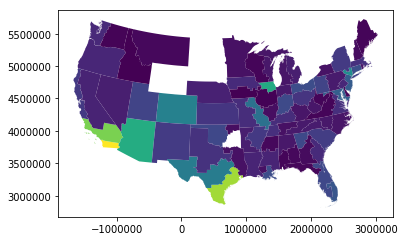

In [374]:
jur_count.plot(column='Count')

AttributeError: 'AxesSubplot' object has no attribute 'colorbar'

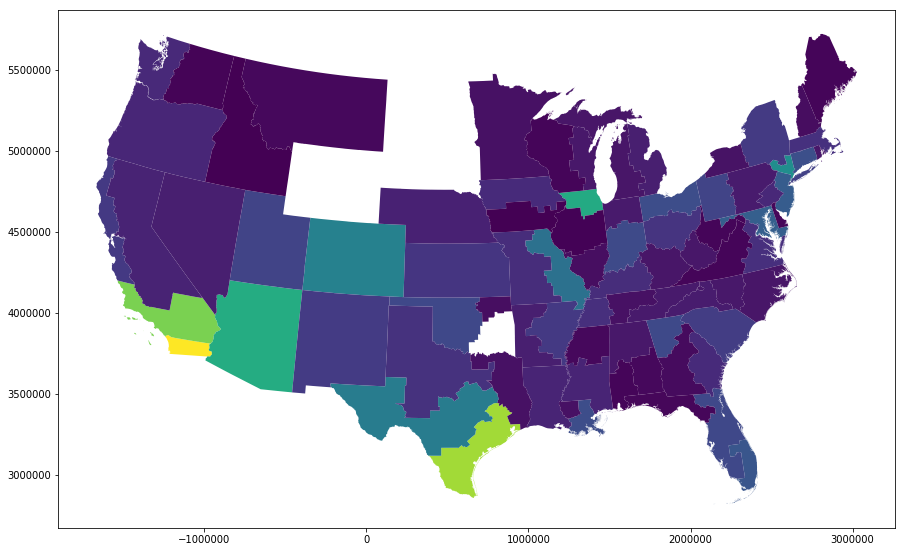

In [410]:
jur_count.plot(column='Count', figsize=(15,15)).colorbar()

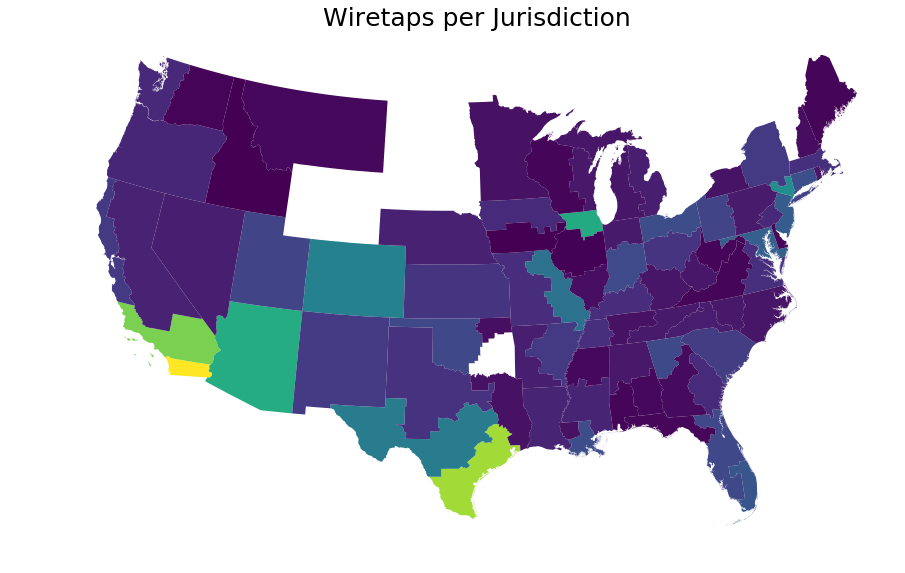

In [408]:
#Set up figure and axis with different size
f, ax = plt.subplots(1, figsize=(15,15))
#Add layer of polygons on the axis
jur_count.plot(column='Count', ax=ax, legend=False)
#Remove axis
ax.set_axis_off()
#Set title 
ax.set_title('Wiretaps per Jurisdiction', fontsize=25)
#Display
plt.show()

In [ ]:
def geopandas_colorbar_same_height(f, ax, vmin, vmax, cmap):
    from matplotlib.colors import Normalize
    from matplotlib import cm
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    # Create colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.2)

    norm = Normalize(vmin=vmin, vmax=vmax)
    n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
    n_cmap.set_array([])

    f.colorbar(n_cmap, cax=cax)

Text(0.5,1,'Wiretaps per Jurisdiction')

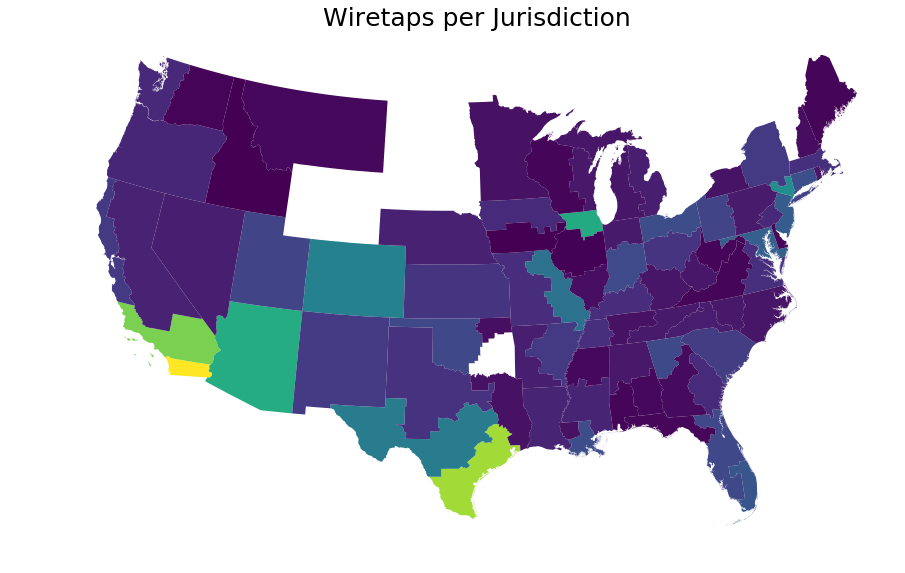

In [407]:
from matplotlib.colors import Normalize
from matplotlib import cm

#Set up figure and axis with different size
f, ax = plt.subplots(1, figsize=(15,15))
#Add layer of polygons on the axis
jur_count.plot(column='Count', ax=ax, legend=False)
#Legend

n_cmap.set_array([])
#Remove axis
ax.set_axis_off()
#Set title 
ax.set_title('Wiretaps per Jurisdiction', fontsize=25)

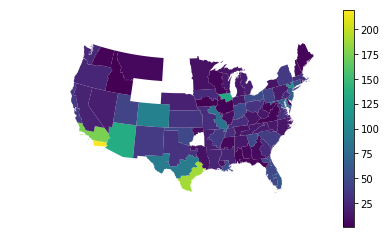

In [406]:
from matplotlib.colors import Normalize
from matplotlib import cm
import geopandas as gpd

ax = jur_count.plot(column='Count', legend=False)
mn = jur_count.Count.min()
mx = jur_count.Count.max()
norm = Normalize(vmin=mn, vmax=mx)
n_cmap = cm.ScalarMappable(norm=norm, cmap="viridis")
n_cmap.set_array([])
ax.set_axis_off()
ax.get_figure().colorbar(n_cmap, ax=ax, orientation='vertical')